In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [2]:
env = gym.make("FrozenLake-v1")
env.render()


SFFF
FHFH
FFFH
HFFG


    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

In [3]:
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)

State space:  Discrete(16)
Action space:  Discrete(4)


In [4]:
# Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:
# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 0.1

In [6]:
# Plotting List
step_list = []
reward_list = []

In [7]:
episode_number = 20000
for i in range(1, episode_number):
    
    # initalize environment
    state = env.reset()
    step_count = 0
    reward_count = 0
    
    while True:
            
        # exploit vs explore to find action
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
            
        # action process and take reward/abservation
        next_state, reward, done, _ = env.step(action)
        
        # Q-function
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
        
        # Q-table update
        q_table[state, action] = new_value
        
        # update state
        state = next_state
        
        step_count += 1
        reward_count += reward
        
        if done: break
            
    if i%10 == 0:
        step_list.append(step_count)
        print("Episode: {}, step: {}, reward: {}".format(i, step_count, reward_count))

Episode: 10, step: 9, reward: 0.0
Episode: 20, step: 9, reward: 0.0
Episode: 30, step: 21, reward: 0.0
Episode: 40, step: 10, reward: 0.0
Episode: 50, step: 5, reward: 0.0
Episode: 60, step: 26, reward: 0.0
Episode: 70, step: 19, reward: 0.0
Episode: 80, step: 3, reward: 0.0
Episode: 90, step: 30, reward: 0.0
Episode: 100, step: 19, reward: 0.0
Episode: 110, step: 19, reward: 0.0
Episode: 120, step: 7, reward: 0.0
Episode: 130, step: 25, reward: 0.0
Episode: 140, step: 10, reward: 0.0
Episode: 150, step: 3, reward: 0.0
Episode: 160, step: 6, reward: 0.0
Episode: 170, step: 17, reward: 0.0
Episode: 180, step: 7, reward: 0.0
Episode: 190, step: 13, reward: 0.0
Episode: 200, step: 15, reward: 0.0
Episode: 210, step: 19, reward: 0.0
Episode: 220, step: 5, reward: 0.0
Episode: 230, step: 27, reward: 0.0
Episode: 240, step: 11, reward: 0.0
Episode: 250, step: 23, reward: 0.0
Episode: 260, step: 10, reward: 0.0
Episode: 270, step: 3, reward: 0.0
Episode: 280, step: 46, reward: 0.0
Episode: 29

Episode: 2340, step: 14, reward: 0.0
Episode: 2350, step: 5, reward: 0.0
Episode: 2360, step: 6, reward: 0.0
Episode: 2370, step: 7, reward: 0.0
Episode: 2380, step: 22, reward: 0.0
Episode: 2390, step: 4, reward: 0.0
Episode: 2400, step: 4, reward: 0.0
Episode: 2410, step: 4, reward: 0.0
Episode: 2420, step: 14, reward: 0.0
Episode: 2430, step: 21, reward: 0.0
Episode: 2440, step: 17, reward: 0.0
Episode: 2450, step: 15, reward: 0.0
Episode: 2460, step: 11, reward: 0.0
Episode: 2470, step: 12, reward: 0.0
Episode: 2480, step: 16, reward: 0.0
Episode: 2490, step: 13, reward: 0.0
Episode: 2500, step: 4, reward: 0.0
Episode: 2510, step: 6, reward: 0.0
Episode: 2520, step: 12, reward: 0.0
Episode: 2530, step: 17, reward: 0.0
Episode: 2540, step: 24, reward: 0.0
Episode: 2550, step: 33, reward: 0.0
Episode: 2560, step: 12, reward: 0.0
Episode: 2570, step: 5, reward: 0.0
Episode: 2580, step: 13, reward: 0.0
Episode: 2590, step: 12, reward: 0.0
Episode: 2600, step: 8, reward: 0.0
Episode: 26

Episode: 4720, step: 10, reward: 0.0
Episode: 4730, step: 4, reward: 0.0
Episode: 4740, step: 8, reward: 0.0
Episode: 4750, step: 33, reward: 0.0
Episode: 4760, step: 19, reward: 0.0
Episode: 4770, step: 4, reward: 0.0
Episode: 4780, step: 33, reward: 0.0
Episode: 4790, step: 21, reward: 0.0
Episode: 4800, step: 11, reward: 0.0
Episode: 4810, step: 14, reward: 0.0
Episode: 4820, step: 3, reward: 0.0
Episode: 4830, step: 21, reward: 0.0
Episode: 4840, step: 18, reward: 0.0
Episode: 4850, step: 26, reward: 0.0
Episode: 4860, step: 4, reward: 0.0
Episode: 4870, step: 6, reward: 0.0
Episode: 4880, step: 31, reward: 0.0
Episode: 4890, step: 6, reward: 0.0
Episode: 4900, step: 16, reward: 0.0
Episode: 4910, step: 6, reward: 0.0
Episode: 4920, step: 39, reward: 0.0
Episode: 4930, step: 9, reward: 0.0
Episode: 4940, step: 19, reward: 0.0
Episode: 4950, step: 76, reward: 0.0
Episode: 4960, step: 22, reward: 0.0
Episode: 4970, step: 6, reward: 0.0
Episode: 4980, step: 18, reward: 0.0
Episode: 49

Episode: 7000, step: 26, reward: 0.0
Episode: 7010, step: 26, reward: 0.0
Episode: 7020, step: 5, reward: 0.0
Episode: 7030, step: 9, reward: 0.0
Episode: 7040, step: 39, reward: 0.0
Episode: 7050, step: 16, reward: 0.0
Episode: 7060, step: 9, reward: 0.0
Episode: 7070, step: 6, reward: 0.0
Episode: 7080, step: 3, reward: 0.0
Episode: 7090, step: 18, reward: 0.0
Episode: 7100, step: 4, reward: 0.0
Episode: 7110, step: 3, reward: 0.0
Episode: 7120, step: 21, reward: 0.0
Episode: 7130, step: 13, reward: 0.0
Episode: 7140, step: 4, reward: 0.0
Episode: 7150, step: 4, reward: 0.0
Episode: 7160, step: 30, reward: 0.0
Episode: 7170, step: 12, reward: 0.0
Episode: 7180, step: 12, reward: 0.0
Episode: 7190, step: 5, reward: 0.0
Episode: 7200, step: 12, reward: 0.0
Episode: 7210, step: 13, reward: 0.0
Episode: 7220, step: 8, reward: 0.0
Episode: 7230, step: 7, reward: 0.0
Episode: 7240, step: 5, reward: 0.0
Episode: 7250, step: 79, reward: 0.0
Episode: 7260, step: 3, reward: 0.0
Episode: 7270, 

Episode: 9290, step: 14, reward: 0.0
Episode: 9300, step: 14, reward: 0.0
Episode: 9310, step: 6, reward: 0.0
Episode: 9320, step: 38, reward: 0.0
Episode: 9330, step: 39, reward: 0.0
Episode: 9340, step: 6, reward: 0.0
Episode: 9350, step: 9, reward: 0.0
Episode: 9360, step: 10, reward: 0.0
Episode: 9370, step: 11, reward: 0.0
Episode: 9380, step: 5, reward: 0.0
Episode: 9390, step: 13, reward: 0.0
Episode: 9400, step: 5, reward: 0.0
Episode: 9410, step: 6, reward: 0.0
Episode: 9420, step: 22, reward: 0.0
Episode: 9430, step: 42, reward: 0.0
Episode: 9440, step: 59, reward: 0.0
Episode: 9450, step: 32, reward: 0.0
Episode: 9460, step: 6, reward: 0.0
Episode: 9470, step: 2, reward: 0.0
Episode: 9480, step: 20, reward: 0.0
Episode: 9490, step: 12, reward: 0.0
Episode: 9500, step: 43, reward: 0.0
Episode: 9510, step: 8, reward: 0.0
Episode: 9520, step: 18, reward: 0.0
Episode: 9530, step: 9, reward: 0.0
Episode: 9540, step: 20, reward: 0.0
Episode: 9550, step: 24, reward: 0.0
Episode: 95

Episode: 11520, step: 3, reward: 0.0
Episode: 11530, step: 5, reward: 0.0
Episode: 11540, step: 4, reward: 0.0
Episode: 11550, step: 13, reward: 0.0
Episode: 11560, step: 3, reward: 0.0
Episode: 11570, step: 4, reward: 0.0
Episode: 11580, step: 9, reward: 0.0
Episode: 11590, step: 34, reward: 0.0
Episode: 11600, step: 5, reward: 0.0
Episode: 11610, step: 29, reward: 0.0
Episode: 11620, step: 5, reward: 0.0
Episode: 11630, step: 14, reward: 0.0
Episode: 11640, step: 17, reward: 0.0
Episode: 11650, step: 5, reward: 0.0
Episode: 11660, step: 4, reward: 0.0
Episode: 11670, step: 20, reward: 0.0
Episode: 11680, step: 3, reward: 0.0
Episode: 11690, step: 6, reward: 0.0
Episode: 11700, step: 15, reward: 0.0
Episode: 11710, step: 11, reward: 0.0
Episode: 11720, step: 31, reward: 0.0
Episode: 11730, step: 22, reward: 0.0
Episode: 11740, step: 11, reward: 0.0
Episode: 11750, step: 16, reward: 0.0
Episode: 11760, step: 8, reward: 0.0
Episode: 11770, step: 24, reward: 0.0
Episode: 11780, step: 9, 

Episode: 13850, step: 12, reward: 0.0
Episode: 13860, step: 6, reward: 0.0
Episode: 13870, step: 14, reward: 0.0
Episode: 13880, step: 63, reward: 0.0
Episode: 13890, step: 18, reward: 0.0
Episode: 13900, step: 4, reward: 0.0
Episode: 13910, step: 6, reward: 0.0
Episode: 13920, step: 29, reward: 0.0
Episode: 13930, step: 6, reward: 0.0
Episode: 13940, step: 14, reward: 0.0
Episode: 13950, step: 5, reward: 0.0
Episode: 13960, step: 3, reward: 0.0
Episode: 13970, step: 6, reward: 0.0
Episode: 13980, step: 13, reward: 0.0
Episode: 13990, step: 14, reward: 0.0
Episode: 14000, step: 5, reward: 0.0
Episode: 14010, step: 3, reward: 0.0
Episode: 14020, step: 9, reward: 0.0
Episode: 14030, step: 5, reward: 0.0
Episode: 14040, step: 21, reward: 0.0
Episode: 14050, step: 12, reward: 0.0
Episode: 14060, step: 18, reward: 0.0
Episode: 14070, step: 18, reward: 0.0
Episode: 14080, step: 21, reward: 0.0
Episode: 14090, step: 6, reward: 0.0
Episode: 14100, step: 5, reward: 0.0
Episode: 14110, step: 26,

Episode: 16140, step: 32, reward: 0.0
Episode: 16150, step: 75, reward: 0.0
Episode: 16160, step: 28, reward: 0.0
Episode: 16170, step: 28, reward: 0.0
Episode: 16180, step: 16, reward: 0.0
Episode: 16190, step: 21, reward: 0.0
Episode: 16200, step: 21, reward: 0.0
Episode: 16210, step: 48, reward: 0.0
Episode: 16220, step: 23, reward: 0.0
Episode: 16230, step: 3, reward: 0.0
Episode: 16240, step: 19, reward: 0.0
Episode: 16250, step: 17, reward: 0.0
Episode: 16260, step: 27, reward: 0.0
Episode: 16270, step: 27, reward: 0.0
Episode: 16280, step: 8, reward: 0.0
Episode: 16290, step: 5, reward: 0.0
Episode: 16300, step: 6, reward: 0.0
Episode: 16310, step: 15, reward: 0.0
Episode: 16320, step: 5, reward: 0.0
Episode: 16330, step: 23, reward: 0.0
Episode: 16340, step: 16, reward: 0.0
Episode: 16350, step: 12, reward: 0.0
Episode: 16360, step: 19, reward: 0.0
Episode: 16370, step: 5, reward: 0.0
Episode: 16380, step: 10, reward: 0.0
Episode: 16390, step: 4, reward: 0.0
Episode: 16400, ste

Episode: 18480, step: 8, reward: 0.0
Episode: 18490, step: 11, reward: 0.0
Episode: 18500, step: 8, reward: 0.0
Episode: 18510, step: 10, reward: 0.0
Episode: 18520, step: 2, reward: 0.0
Episode: 18530, step: 23, reward: 0.0
Episode: 18540, step: 15, reward: 0.0
Episode: 18550, step: 4, reward: 0.0
Episode: 18560, step: 28, reward: 0.0
Episode: 18570, step: 13, reward: 0.0
Episode: 18580, step: 42, reward: 0.0
Episode: 18590, step: 5, reward: 0.0
Episode: 18600, step: 14, reward: 0.0
Episode: 18610, step: 38, reward: 0.0
Episode: 18620, step: 18, reward: 0.0
Episode: 18630, step: 47, reward: 0.0
Episode: 18640, step: 9, reward: 0.0
Episode: 18650, step: 4, reward: 0.0
Episode: 18660, step: 31, reward: 0.0
Episode: 18670, step: 23, reward: 0.0
Episode: 18680, step: 13, reward: 0.0
Episode: 18690, step: 6, reward: 0.0
Episode: 18700, step: 8, reward: 0.0
Episode: 18710, step: 3, reward: 0.0
Episode: 18720, step: 12, reward: 0.0
Episode: 18730, step: 5, reward: 0.0
Episode: 18740, step: 9

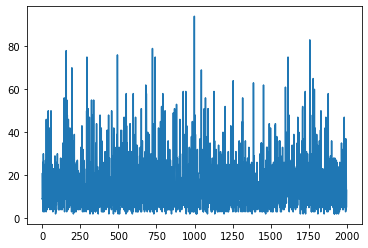

In [8]:
plt.plot(step_list)

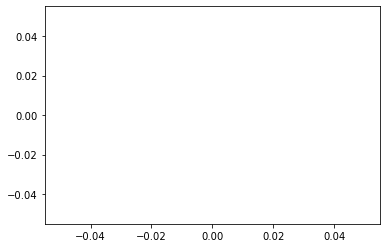

In [9]:
plt.plot(reward_list)